In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_dir = "/content/drive/MyDrive/Automatic Number Plate Recognition/images/"

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from glob import glob
import xml.etree.ElementTree as xet
from shutil import copy
from PIL import Image

In [4]:
file_list = glob(file_dir + "*.xml")

imgpaths = []
box_details = dict(xmin = [], xmax = [], ymin = [], ymax = [], center_x = [], center_y = [], bwidth = [], bheight = [])

for file_name in file_list:
      content = xet.parse(file_name)
      root = content.getroot()
      object_details = root.find("object")
      img_name = root.find("filename").text
      img_path = os.path.join(file_dir, img_name)
      imgpaths.append(img_path)
      box_info = object_details.find('bndbox')
      xmin = int(box_info.find('xmin').text)
      xmax = int(box_info.find('xmax').text)
      ymin = int(box_info.find('ymin').text)
      ymax = int(box_info.find('ymax').text)
      box_details['xmin'].append(xmin)
      box_details['xmax'].append(xmax)
      box_details['ymin'].append(ymin)
      box_details['ymax'].append(ymax)
      parser_size = root.find('size')
      width = int(parser_size.find('width').text)
      height = int(parser_size.find('height').text)
      box_details['center_x'].append((xmax + xmin)/(2*width))
      box_details['center_y'].append((ymax + ymin)/(2*height))
      box_details['bwidth'].append((xmax - xmin)/(width))
      box_details['bheight'].append((ymax - ymin)/(height))



In [5]:
df = pd.DataFrame({'file path': imgpaths, **box_details})
print(df)

                                             file path  xmin  xmax  ymin  \
0    /content/drive/MyDrive/Automatic Number Plate ...    31   139   128   
1    /content/drive/MyDrive/Automatic Number Plate ...    66   154   166   
2    /content/drive/MyDrive/Automatic Number Plate ...  1093  1396   645   
3    /content/drive/MyDrive/Automatic Number Plate ...   360   434   174   
4    /content/drive/MyDrive/Automatic Number Plate ...   164   316   216   
..                                                 ...   ...   ...   ...   
220  /content/drive/MyDrive/Automatic Number Plate ...   137   352   141   
221  /content/drive/MyDrive/Automatic Number Plate ...    63   243   234   
222  /content/drive/MyDrive/Automatic Number Plate ...   563   675   207   
223  /content/drive/MyDrive/Automatic Number Plate ...   113   420   209   
224  /content/drive/MyDrive/Automatic Number Plate ...   158   389   129   

     ymax  center_x  center_y    bwidth   bheight  
0     161  0.341365  0.604603  0.43

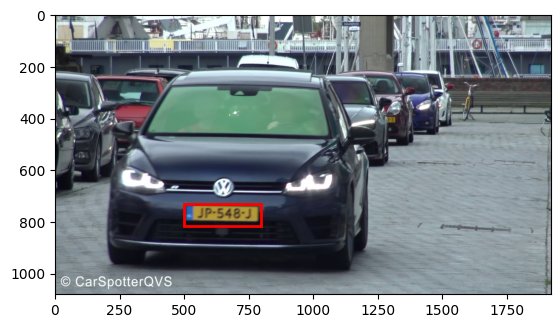

In [6]:
index = 100
test_img = df['file path'][index]
left = df['xmin'][index]
top = df['ymin'][index]
width = df['xmax'][index] - df['xmin'][index]
height = df['ymax'][index] - df['ymin'][index]
image = Image.open(test_img)
fig, ax = plt.subplots()
ax.imshow(image)
rect = patches.Rectangle((left, top), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

YOLO

In [7]:
!git clone https://github.com/ultralytics/yolov5
!pip install -U -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16246, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 16246 (delta 53), reused 69 (delta 20), pack-reused 16103
Receiving objects: 100% (16246/16246), 15.07 MiB | 18.96 MiB/s, done.
Resolving deltas: 100% (11088/11088), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.5/285.5 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 112.8 MB/s eta 0:00:00

In [8]:
import torch
print('Available: %s' % (torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Available: _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [9]:
%cd /content/yolov5

/content/yolov5


In [10]:
!mkdir data_images

In [11]:
!mkdir data_images/train
!mkdir data_images/test

In [12]:
df_train = df.iloc[:200]
df_test = df.iloc[200:]

In [13]:
print(df_train)

                                             file path  xmin  xmax  ymin  \
0    /content/drive/MyDrive/Automatic Number Plate ...    31   139   128   
1    /content/drive/MyDrive/Automatic Number Plate ...    66   154   166   
2    /content/drive/MyDrive/Automatic Number Plate ...  1093  1396   645   
3    /content/drive/MyDrive/Automatic Number Plate ...   360   434   174   
4    /content/drive/MyDrive/Automatic Number Plate ...   164   316   216   
..                                                 ...   ...   ...   ...   
195  /content/drive/MyDrive/Automatic Number Plate ...   186   325   177   
196  /content/drive/MyDrive/Automatic Number Plate ...   164   336   162   
197  /content/drive/MyDrive/Automatic Number Plate ...   163   320   247   
198  /content/drive/MyDrive/Automatic Number Plate ...  1149  1358   649   
199  /content/drive/MyDrive/Automatic Number Plate ...   361   566   190   

     ymax  center_x  center_y    bwidth   bheight  
0     161  0.341365  0.604603  0.43

In [14]:
def buildDataset(folder, values):
    for filename, x, y, w, h in values:
        img_name = os.path.split(filename)[-1]
        name_only = os.path.splitext(img_name)[0]
        data_img_path = os.path.join(folder, img_name)
        data_label_path = os.path.join(folder, name_only + ".txt")
        copy(filename, data_img_path)

        label_txt = f'0 {x} {y} {w} {h}'
        with open(data_label_path, mode = 'w') as f:
            f.write(label_txt)
            f.close()


In [15]:
train_folder = "/content/yolov5/data_images/train"
test_folder = "/content/yolov5/data_images/test"
train_val = df_train[['file path', 'center_x', 'center_y', 'bwidth', 'bheight']].values
test_val = df_test[['file path', 'center_x', 'center_y', 'bwidth', 'bheight']].values
buildDataset(train_folder, train_val)
buildDataset(test_folder, test_val)

In [16]:
!python /content/yolov5/train.py --data /content/data.yaml --cfg /content/yolov5/models/yolov5s.yaml --batch-size 8 --name Model --epochs 100

2024-01-08 04:56:16.792671: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 04:56:16.792774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 04:56:16.900064: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=

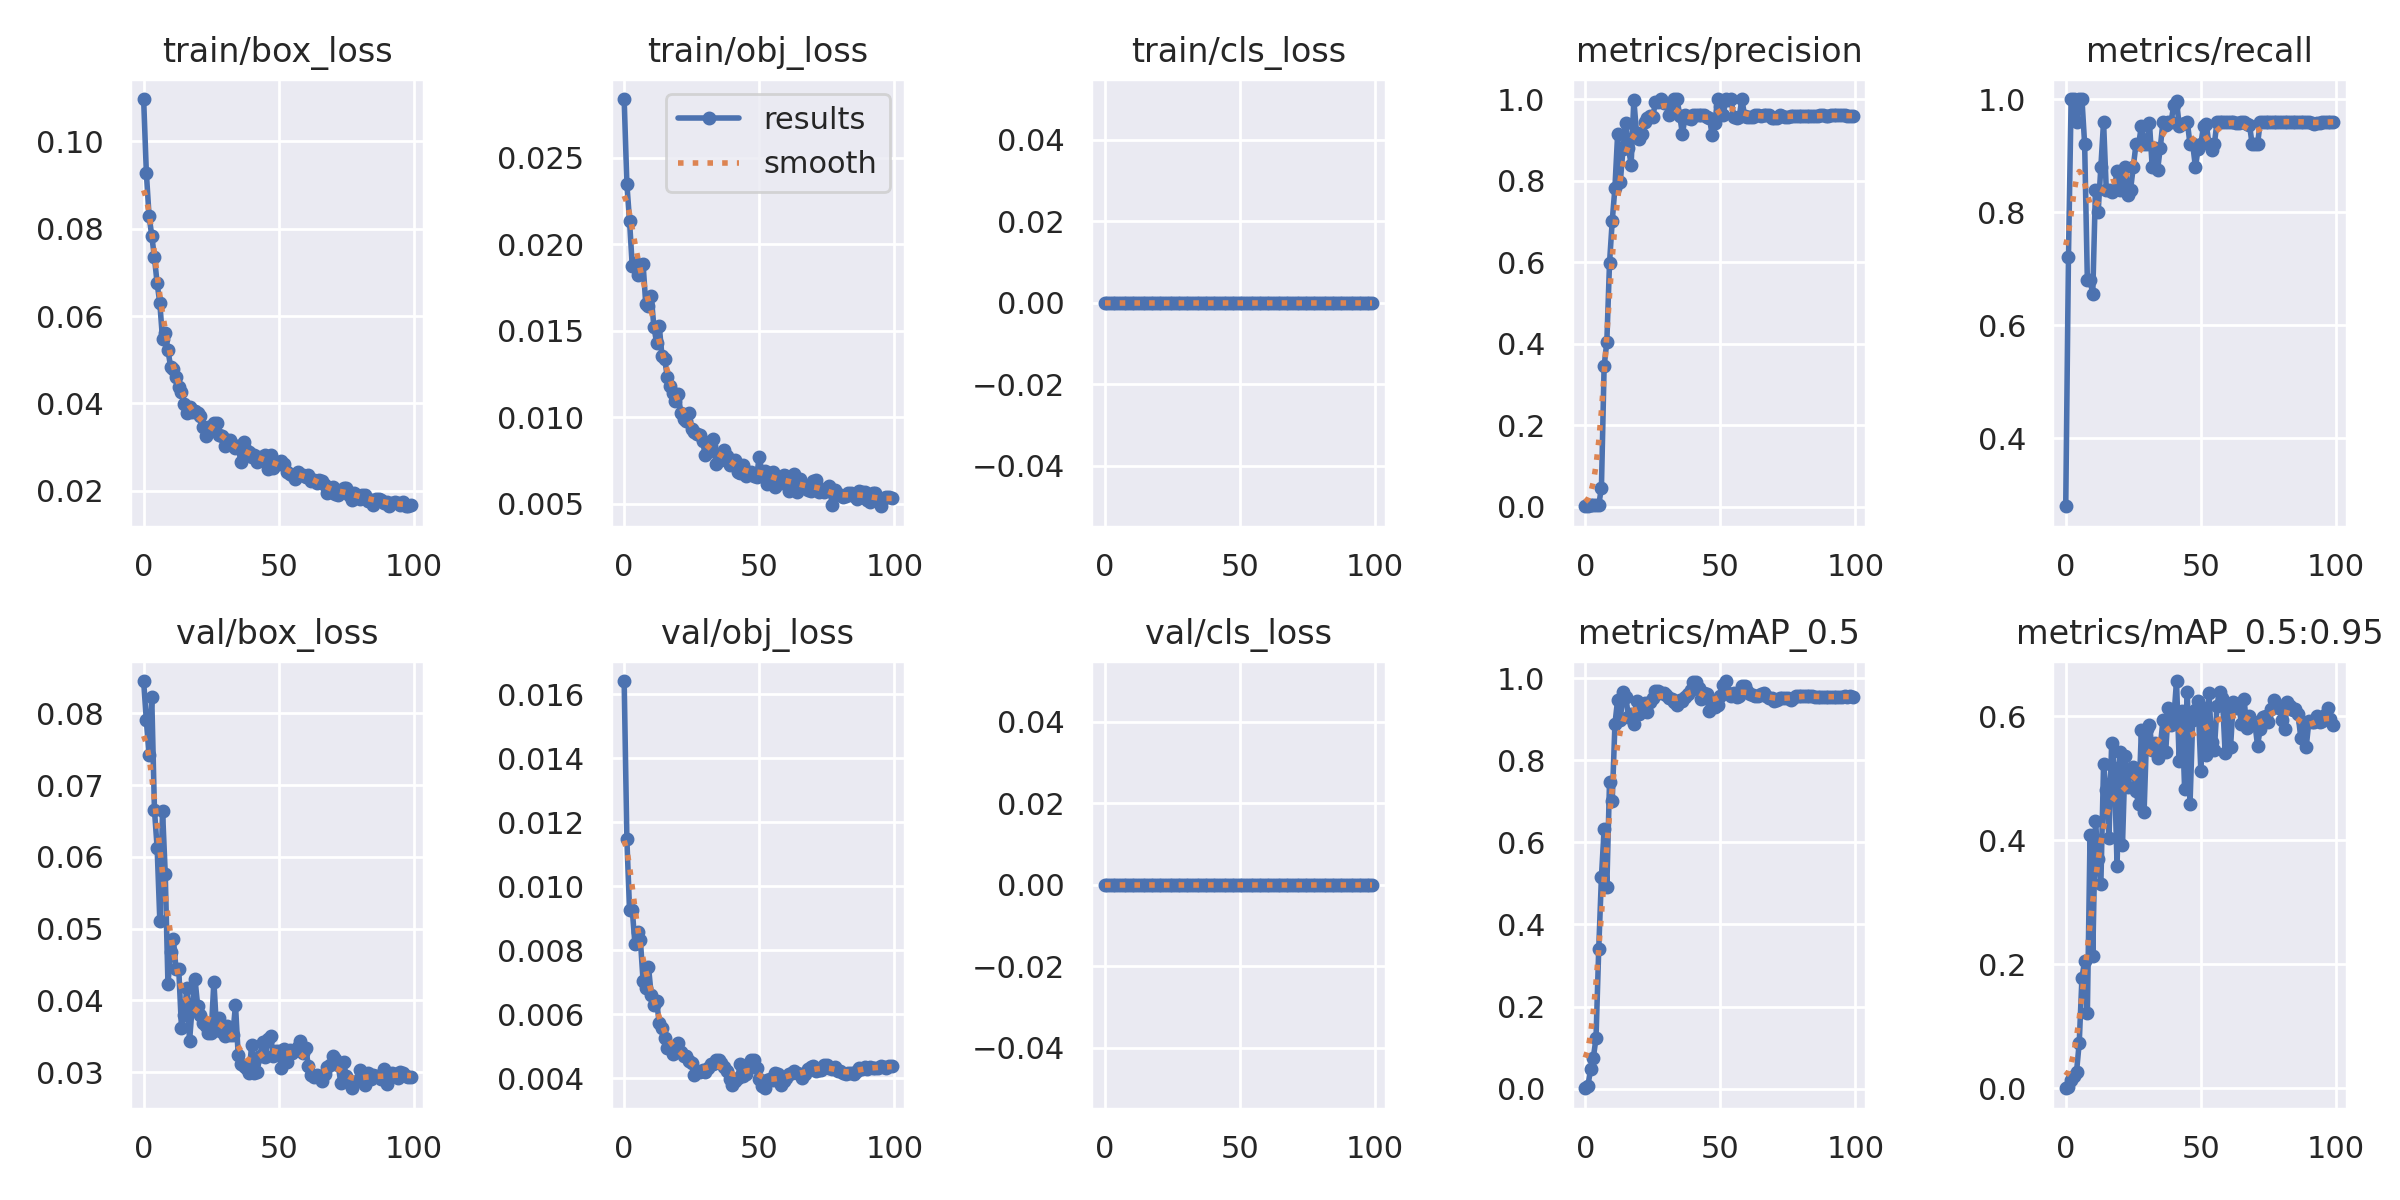

In [20]:
from PIL import Image
from IPython.display import display
image = Image.open('/content/yolov5/runs/train/Model/results.png')
display(image)


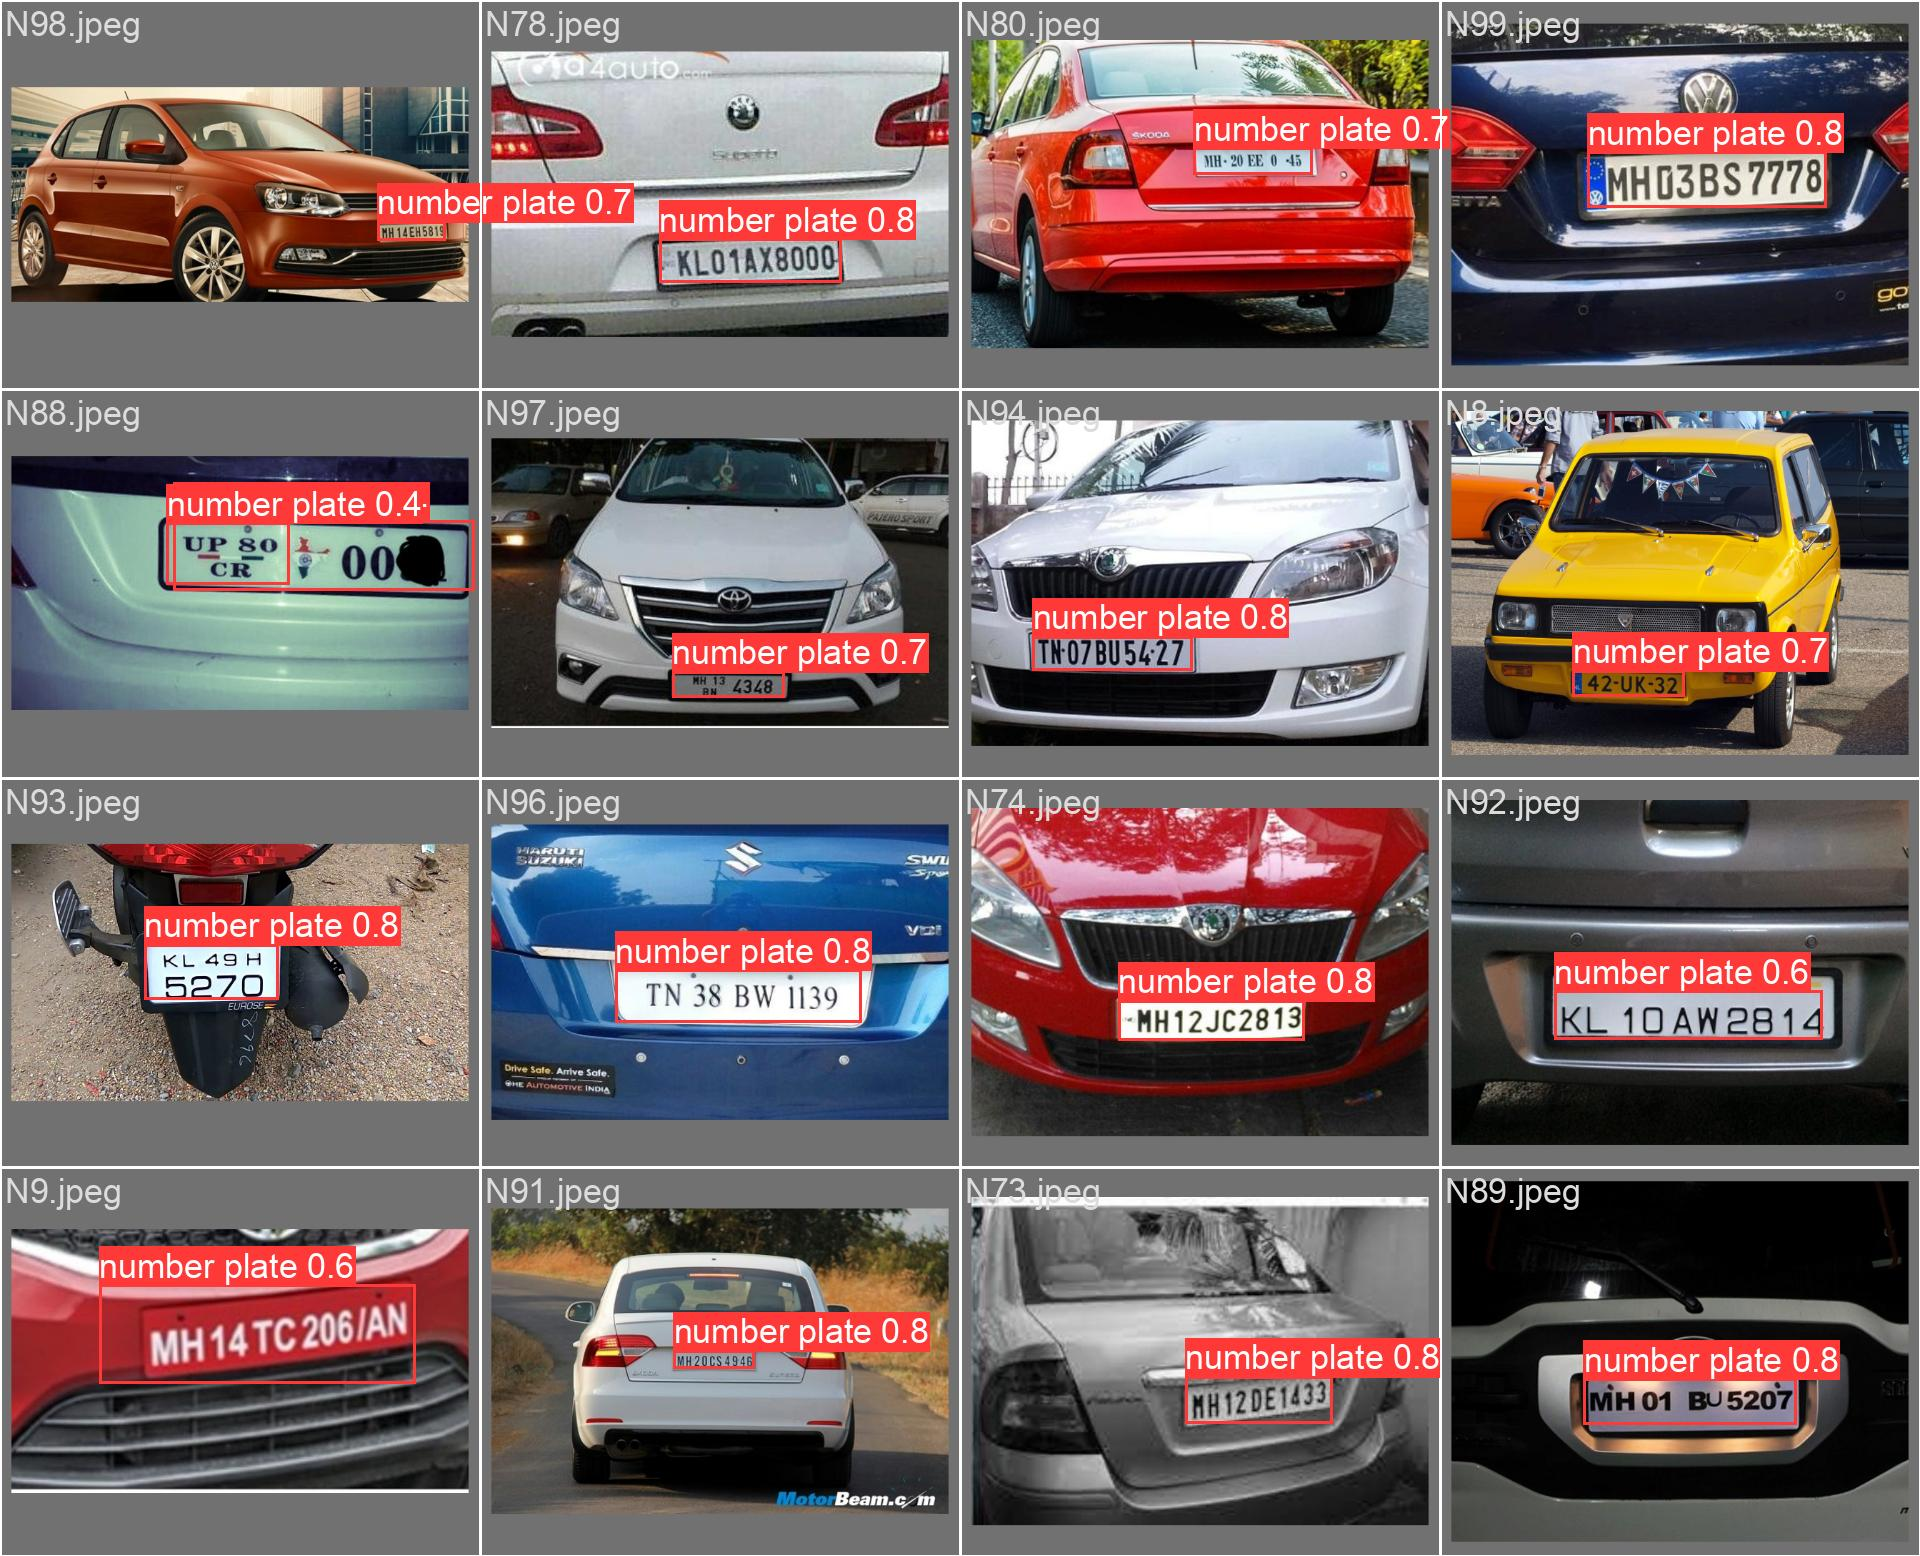

In [22]:
image = Image.open('/content/yolov5/runs/train/Model/val_batch0_pred.jpg')
display(image)